In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [3]:
caminho = 'tabela_imigrantes.xlsx'
tabela_original = pd.read_excel(caminho)
tabela_original

,data_entrada_brasil,data_cadastro,dif_dtcad_dtingr_meses,sexo,fx_etaria,pais_origem,distrito_moradia,condicoes_moradia,cidade_ingresso,cor_raca,escolaridade,situacao_migratoria,fonte_renda,sabendo_crai,demanda_1
0,2012-09-09 00:00:00,2016-05-27 14:23:24.160,44,Masculino,Maiores de 60 anos,Afeganistão,Liberdade,Aluguel ou pensão,Não informado,Amarela,Ensino superior incompleto,Visto permanente,Não informado,Não informado,Documentos
1,2015-06-16 00:00:00,2017-05-31 12:42:03.000,23,Masculino,18 a 29 anos,Afeganistão,Brás,Aluguel ou pensão,Foz do Iguaçu,Branca,Ensino superior incompleto,Solicitante de refúgio,Trabalhador informal ou ambulante,Serviço público,Regularização migratória
2,2010-03-05 00:00:00,2018-03-19 17:33:35.000,96,Masculino,18 a 29 anos,Afeganistão,Pari,Aluguel ou pensão,Guarulhos,Branca,Ensino fundamental incompleto,Visto permanente,"Empresário (MEI, dono de loja, restaurante, etc.)",Instituições ou organizações,Regularização migratória
3,2012-07-25 00:00:00,2018-11-27 15:39:34.004,76,Masculino,18 a 29 anos,Afeganistão,Outro Município,Casa de parente ou amigo,Guarulhos,Branca,Ensino superior incompleto,Visto permanente,Trabalhador informal ou ambulante,Amigos ou parentes,Reinserção no mercado de trabalho
4,2008-10-10 00:00:00,2019-01-10 12:50:49.779,123,Masculino,40 a 49 anos,Afeganistão,Brás,Casa de parente ou amigo,Guarulhos,Branca,Não frequentou escola,Visto permanente,Trabalhador informal ou ambulante,Amigos ou parentes,Regularização migratória
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11829,2017-03-11 00:00:00,2017-04-26 15:03:09.000,1,Feminino,40 a 49 anos,Vietnã,Cambuci,Casa de parente ou amigo,Guarulhos,Amarela,Ensino fundamental completo,Indocumentado/ Irregular,Trabalhador informal ou ambulante,Amigos ou parentes,Regularização migratória
11830,2017-03-11 00:00:00,2017-04-26 15:08:10.000,1,Masculino,18 a 29 anos,Vietnã,Cambuci,Casa de parente ou amigo,Guarulhos,Amarela,Ensino médio completo,Indocumentado/ Irregular,Trabalhador informal ou ambulante,Amigos ou parentes,Regularização migratória
11831,2011-05-07 00:00:00,2016-01-27 00:00:00.000,56,Feminino,50 a 59 anos,Zâmbia,Liberdade,Aluguel ou pensão,Não informado,Preta,Ensino superior completo,Outros,Não informado,Não informado,Não informado
11832,2011-05-14 00:00:00,2016-10-28 14:35:00.352,65,Feminino,Maiores de 60 anos,Zâmbia,Liberdade,Aluguel ou pensão,Não informado,Preta,Ensino médio completo,Outros,Não informado,Não informado,Vaga em Centro de Acolhida


In [10]:
tabela_original['data_entrada_brasil'] = pd.to_datetime(tabela_original['data_entrada_brasil'], errors='coerce')

#remover linhas onde a data não pôde ser reconhecida porque tava dando erro na hr de selecionar so acima do ano 2000
tabela_nova = tabela_original.dropna(subset=['data_entrada_brasil'])

# Remover todas as linhas em que o ano da coluna 'data_entrada_brasil' seja menor do que 2000
tabela_nova = tabela_nova.loc[tabela_nova['data_entrada_brasil'].dt.year >= 2000]

len(tabela_nova)

11153

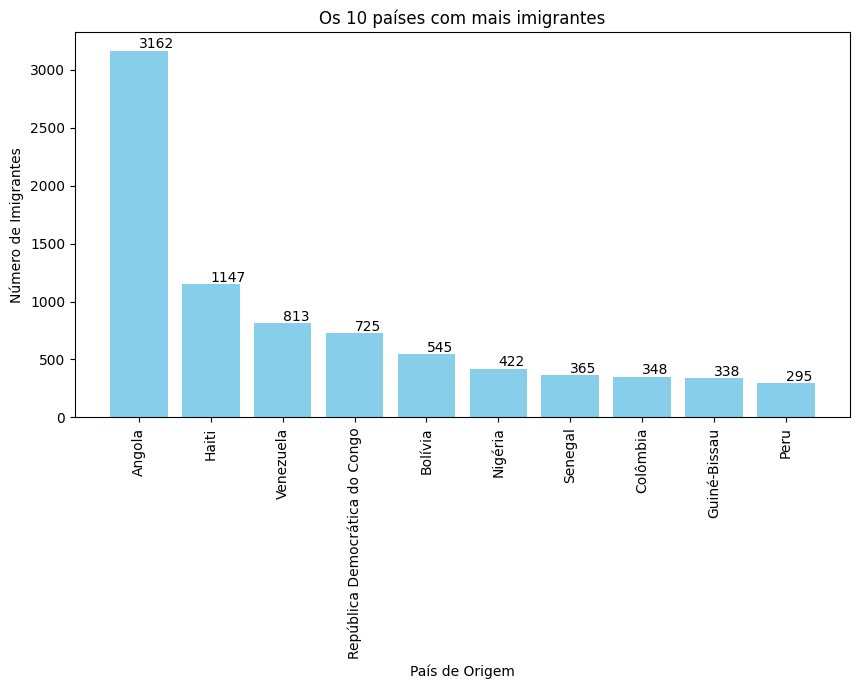

In [15]:
import matplotlib.pyplot as plt

# Contar o número de imigrantes de cada país
contagem_paises = tabela_nova['pais_origem'].value_counts()

# Selecionar os 10 países com mais imigrantes
dez_paises = contagem_paises[:10]

# Criar um gráfico de barras
plt.figure(figsize=(10,5))
bars = plt.bar(dez_paises.index, dez_paises.values, color='skyblue')

# Adicionar a quantidade de imigrantes no topo de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom') # va: vertical alignment

plt.title('Os 10 países com mais imigrantes')
plt.xlabel('País de Origem')
plt.ylabel('Número de Imigrantes')

plt.xticks(rotation=90)

plt.show()


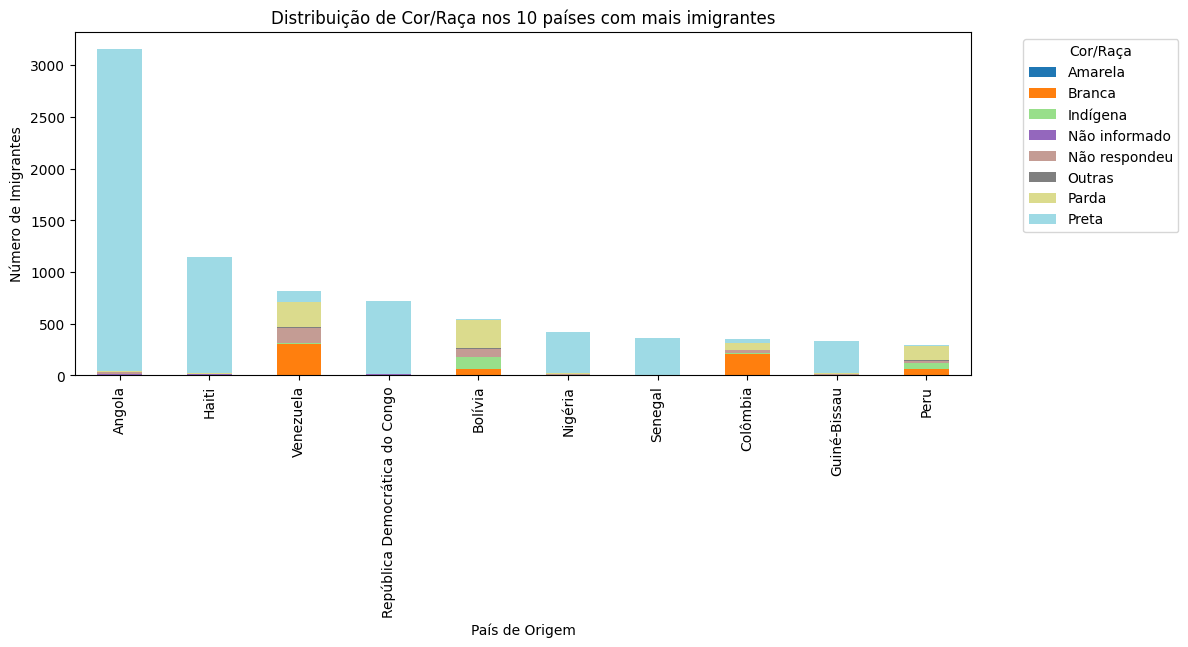

In [23]:
contagem_paises = tabela_nova['pais_origem'].value_counts()

# Seleccionar los 10 países con más inmigrantes
dez_paises = contagem_paises[:10].index

# Filtrar los datos para incluir solo estos 10 países
dados_filtrados = tabela_nova[tabela_nova['pais_origem'].isin(dez_paises)]

# Agrupar por país de origen y color/raza, luego contar los registros
distribuicao_cor_raca = dados_filtrados.groupby(['pais_origem', 'cor_raca']).size().unstack(fill_value=0)

# Crear un gráfico de barras apiladas
distribuicao_cor_raca.loc[dez_paises].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Añadir título y etiquetas
plt.title('Distribuição de Cor/Raça nos 10 países com mais imigrantes')
plt.xlabel('País de Origem')
plt.ylabel('Número de Imigrantes')
plt.xticks(rotation=45)
plt.legend(title='Cor/Raça', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()

plt.xticks(rotation=90)

plt.show()

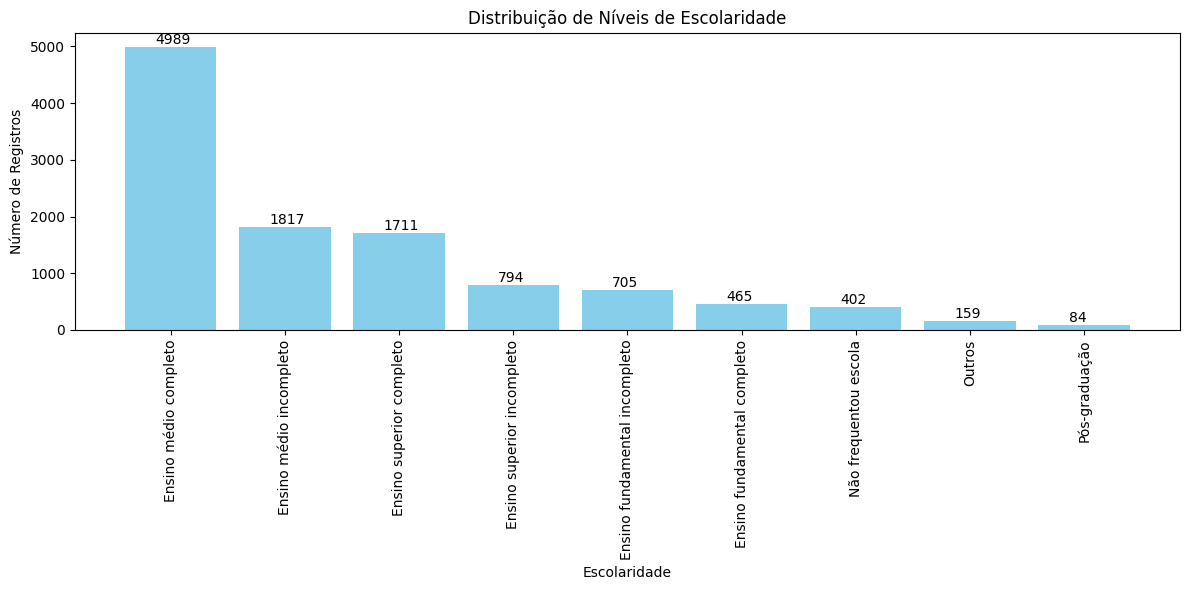

In [31]:
contagem_escolaridade = tabela_nova['escolaridade'].value_counts()

# Ordenar as categorias de escolaridade
ordem_escolaridade = ['Não frequentou escola', 'Ensino fundamental incompleto', 'Ensino fundamental completo',
                      'Ensino médio incompleto', 'Ensino médio completo', 'Ensino superior incompleto',
                      'Ensino superior completo', 'Pós-graduação', 'Outros']

# Garantir que todas as categorias estejam presentes
contagem_escolaridade = contagem_escolaridade.reindex(ordem_escolaridade, fill_value=0)

# Ordenar as contagens de escolaridade pela quantidade
contagem_escolaridade = contagem_escolaridade.sort_values(ascending=False)

# Criar gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(contagem_escolaridade.index, contagem_escolaridade.values, color='skyblue')

# Adicionar a quantidade no topo de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3, yval, int(yval), va='bottom')  # va: alinhamento vertical

# Adicionar título e rótulos aos eixos
plt.title('Distribuição de Níveis de Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Número de Registros')
plt.xticks(rotation=90)

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [ ]:
#Trabalhador informal ou ambulante, 
#Empresário (MEI, dono de loja, restaurante, etc.), 
#Trabalhador autônomo
#Desempregado
#Benefícsempregaios sociais (BPC, Bolsa família, Auxílio aluguel)
#Trabalhador CLT
#Outros
#Não informado, 
#Não se aplica - criança/ adolescente

#Trabalha = #Trabalhador informal ou ambulante, Empresário (MEI, dono de loja, restaurante, etc.), Trabalhador informal ou ambulante, Trabalhador autônomo

#Não tem trabalho = Outros,Não informado, Não se aplica - criança/ adolescente, Desempregado, Benefícios sociais (BPC, Bolsa família, Auxílio aluguel), Desempregado



In [53]:
trabalha = ['Trabalhador informal ou ambulante', 'Empresário (MEI, dono de loja, restaurante, etc.)', 'Trabalhador autônomo', 'Trabalhador CLT']
nao_trabalha = ['Outros', 'Não informado', 'Não se aplica - criança/ adolescente', 'Desempregado', 'Benefícios sociais (BPC, Bolsa família, Auxílio aluguel)', 'Não respondeu']

fonte_de_renda =  tabela_nova[['escolaridade', 'fonte_renda']]
fonte_de_renda['fonte_renda'] = fonte_de_renda['fonte_renda'].replace(trabalha, 'Trabalha')
fonte_de_renda['fonte_renda'] = fonte_de_renda['fonte_renda'].replace(nao_trabalha, 'Não Trabalha')

fonte_de_renda.head()

C:\Users\Biiel\AppData\Local\Temp\ipykernel_17656\2611443432.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fonte_de_renda['fonte_renda'] = fonte_de_renda['fonte_renda'].replace(trabalha, 'Trabalha')
C:\Users\Biiel\AppData\Local\Temp\ipykernel_17656\2611443432.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fonte_de_renda['fonte_renda'] = fonte_de_renda['fonte_renda'].replace(nao_trabalha, 'Não Trabalha')


,escolaridade,fonte_renda
0,Ensino superior incompleto,Não Trabalha
1,Ensino superior incompleto,Trabalha
2,Ensino fundamental incompleto,Trabalha
3,Ensino superior incompleto,Trabalha
4,Não frequentou escola,Trabalha


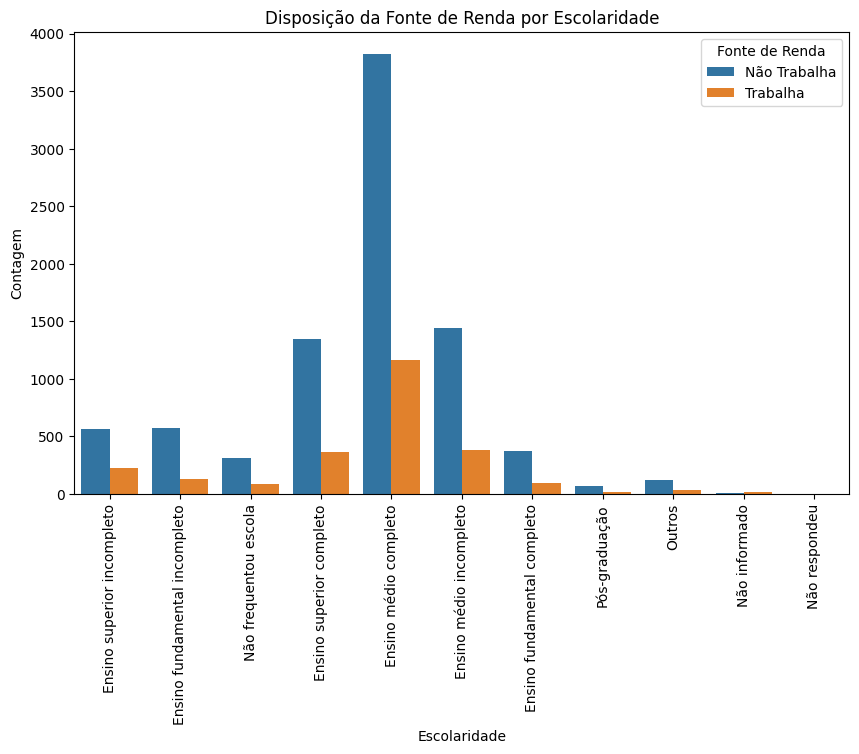

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(data=fonte_de_renda, x='escolaridade', hue='fonte_renda')
plt.title('Disposição da Fonte de Renda por Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.legend(title='Fonte de Renda')
plt.show()

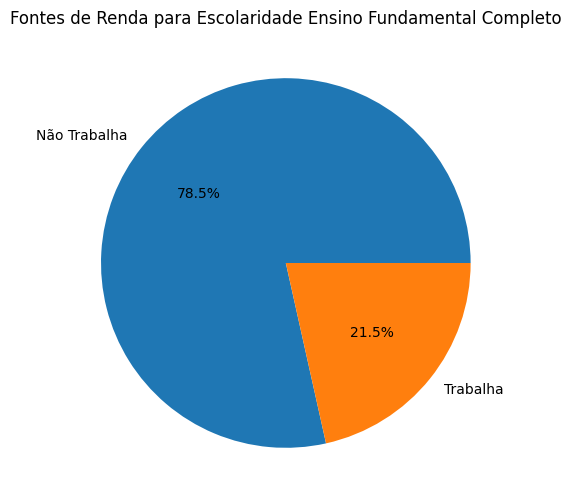

In [57]:
df = fonte_de_renda
df_fundamental_completo = df[df['escolaridade'] == 'Ensino superior completo']

# Contagem de cada fonte de renda
contagem_fonte_renda = df_fundamental_completo['fonte_renda'].value_counts()

# Criação do gráfico de pizza
plt.figure(figsize=(10,6))
plt.pie(contagem_fonte_renda, labels = contagem_fonte_renda.index, autopct='%1.1f%%')
plt.title('Fontes de Renda para Escolaridade Ensino Fundamental Completo')
plt.show()

In [ ]:
## Relação de Escolaridade com o Pais de Origem

In [64]:
EscolaridadeXPaisDeOrigem = tabela_nova[['pais_origem', 'fonte_renda']]
EscolaridadeXPaisDeOrigem.Head()


# df = df[EscolaridadeXPaisDeOrigem['pais_origem'] == 'Angola']

# # Contagem de cada fonte de renda
# contagem_fonte_renda = df_fundamental_completo['fonte_renda'].value_counts()

# # Criação do gráfico de pizza
# plt.figure(figsize=(10,6))
# plt.pie(contagem_fonte_renda, labels = contagem_fonte_renda.index, autopct='%1.1f%%')
# plt.title('Porcentagem de Angolanos')
# plt.show()

AttributeError: 'DataFrame' object has no attribute 'Head'